In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy.stats import ttest_ind

### The above shows that  necessary librairies have been imported.

In [13]:
import os
os.chdir("C:/Users/rayaf/E_commerce")

import pandas as pd
df = pd.read_csv("Data/raw_data/ecommerce_dataset_updated.csv")
print(df.head())


    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89            UPI    01-04-2024  
4            195.84    Net Banking    27-09-2024  


### The above shows that the data has been loaded and the various column headings for the data.

In [14]:
print(os.getcwd())

C:\Users\rayaf\E_commerce


In [15]:

import os

os.makedirs("Data/cleaned_data", exist_ok=True)
df.to_csv("Data/cleaned_data/ecommerce_dataset_cleaned.csv", index=False)
print("Cleaned data saved successfully!")



Cleaned data saved successfully!


### The file has been saved to the cleaned data folder.

In [16]:
print(df.isnull().sum())

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


### There are no null values within this data.

In [17]:
df.isnull().values.any()


False

### I have checked to see if there are no missing values as can be seen from the code above.There are no missing values.

### 1.1 The mean is the average value within the various dataset numeric columns. The median is the middle value, and the standard deviation is concerned with the amount of spread from the mean value. Hypothesis testing is a method in statistics for making inferences about populations using sample data. They are the foundation of data analysis because they provide a clear insight into the dataset. This will reflect trends and patterns with which the data analyst can draw insights and conclusions.

In [18]:
# Mean
print("Mean values:")
print(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].mean())

# Variance
print("\nVariance values:")
print(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].var())


Mean values:
Price (Rs.)         254.800675
Discount (%)         18.825137
Final_Price(Rs.)    206.906579
dtype: float64

Variance values:
Price (Rs.)         20073.965184
Discount (%)          217.012322
Final_Price(Rs.)    15052.307049
dtype: float64


### The values above represent the mean and variance values

In [19]:
# Filter the data
clothing_prices = df[df['Category'] == 'Clothing']['Final_Price(Rs.)']
home_kitchen_prices = df[df['Category'] == 'Home & Kitchen']['Final_Price(Rs.)']

# Run the t-test
t_stat, p_val = ttest_ind(clothing_prices, home_kitchen_prices, equal_var=False)  # Welch's t-test

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.1697391882607717
P-value: 0.03024693781257557


### There is a meaningful difference between the two categories as the p-value is less than 0.05

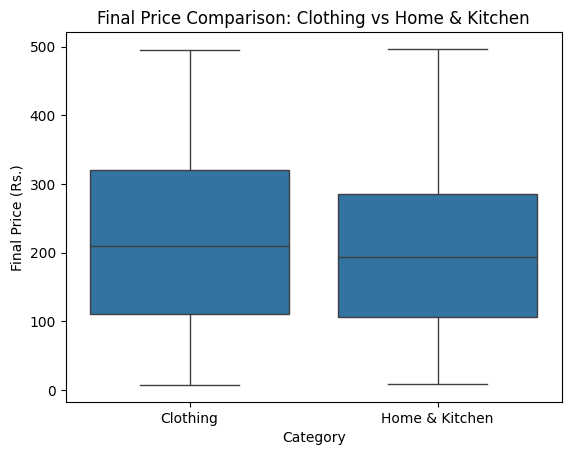

In [20]:
sns.boxplot(data=df[df['Category'].isin(['Clothing', 'Home & Kitchen'])],
            x='Category', y='Final_Price(Rs.)')
plt.title('Final Price Comparison: Clothing vs Home & Kitchen')
plt.ylabel('Final Price (Rs.)')
plt.show()